In [1]:
import sys
!{sys.executable} -m pip install pyspark
!{sys.executable} -m pip install findspark

In [2]:
import findspark
findspark.init("c:/spark-3.1.2-bin-hadoop3.2")
findspark.find()

'c:/spark-3.1.2-bin-hadoop3.2'

In [3]:
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Reactions on covid vaccine") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=Reactions on covid vaccine>

In [4]:
file = spark.read.option("header", "true").csv(path="vaers_jan_aug_2021.csv")

In [5]:
total_lines = file.count()

In [6]:
# see how many people had which vaccine
#pfizer = file.filter("VAX_MANU == 'PFIZER\BIONTECH'").groupBy("VAX_MANU").count()
pfizer = file.where("VAX_MANU like 'PFIZER%'").count()
moderna = file.filter("VAX_MANU == 'MODERNA'").count()
JenJ = file.filter("VAX_MANU == 'JANSSEN'").count()
unknown = file.filter("VAX_MANU == 'UNKNOWN MANUFACTURER'").count()

manus_labels = ['Moderna', 'Jonsen and Jonsen', 'unknown', 'Pfizer\Biontech']
manus = [moderna, JenJ, unknown, pfizer]

manus_percent = []

#convert to %
for i in manus:
    manus_percent.append(i * 100 / total_lines)

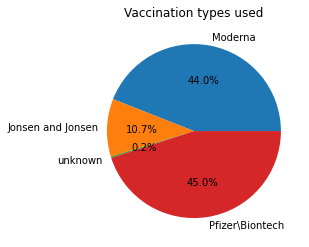

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.pie(manus_percent, labels=manus_labels, autopct='%1.1f%%')
plt.title('Vaccination types used')
plt.show()

In [8]:
import operator
import itertools
# see the 5 most common symptoms of pfizer and moderna (they are the 2 biggest)

#pfyzer
symptoms1_pf = file.where("VAX_MANU like 'PFIZER%' and SYMPTOM1 is not NULL").groupBy("SYMPTOM1").count().orderBy("count", ascending=False).limit(5)
symptoms2_pf = file.where("VAX_MANU like 'PFIZER%' and SYMPTOM2 is not NULL").groupBy("SYMPTOM2").count().orderBy("count", ascending=False).limit(5)
symptoms3_pf = file.where("VAX_MANU like 'PFIZER%' and SYMPTOM3 is not NULL").groupBy("SYMPTOM3").count().orderBy("count", ascending=False).limit(5)
symptoms4_pf = file.where("VAX_MANU like 'PFIZER%' and SYMPTOM4 is not NULL").groupBy("SYMPTOM4").count().orderBy("count", ascending=False).limit(5)
symptoms5_pf = file.where("VAX_MANU like 'PFIZER%' and SYMPTOM5 is not NULL").groupBy("SYMPTOM5").count().orderBy("count", ascending=False).limit(5)

big_five_pf = {}

all_rows_pf = []
row1 = symptoms1_pf.take(5)
row2 = symptoms2_pf.take(5)
row3 = symptoms3_pf.take(5)
row4 = symptoms4_pf.take(5)
row5 = symptoms5_pf.take(5)
all_rows_pf.append(row1)
all_rows_pf.append(row2)
all_rows_pf.append(row3)
all_rows_pf.append(row4)
all_rows_pf.append(row5)

# append all symptoms for ease of use
for row in all_rows_pf:
    for symp in row:
        big_five_pf[symp[0]] = 0

# update the amount of times it was mentioned in the data
for row in all_rows_pf:
    for symp in row:
#         print(symp[0], symp[1]) 
        big_five_pf[symp[0]] = big_five_pf[symp[0]] + symp[1]
         
# print("dict: ")
# for x, y in big_five.items():
#     print(x, y)

# print("now sorted: ")
big_five_pf_sorted = dict(sorted(big_five_pf.items(), key=operator.itemgetter(1), reverse=True))
# for x, y in big_five_sorted.items():
#     print(x, y)
    
print("The 5 biggest symptoms for pfizer: ")
pfizer_symp_names = []
pfizer_symp_amounts = []
top_five_pf = dict(itertools.islice(big_five_pf_sorted.items(), 5))
for x, y in top_five_pf.items():
    print(x, y)
    pfizer_symp_names.append(x)
    pfizer_symp_amounts.append(y)


    
print("\n")
    
#Moderna
symptoms1_mod = file.filter("VAX_MANU like 'MODERNA' and SYMPTOM1 is not NULL").groupBy("SYMPTOM1").count().orderBy("count", ascending=False).limit(5)
symptoms2_mod = file.filter("VAX_MANU like 'MODERNA' and SYMPTOM2 is not NULL").groupBy("SYMPTOM2").count().orderBy("count", ascending=False).limit(5)
symptoms3_mod = file.filter("VAX_MANU like 'MODERNA' and SYMPTOM3 is not NULL").groupBy("SYMPTOM3").count().orderBy("count", ascending=False).limit(5)
symptoms4_mod = file.filter("VAX_MANU like 'MODERNA' and SYMPTOM4 is not NULL").groupBy("SYMPTOM4").count().orderBy("count", ascending=False).limit(5)
symptoms5_mod = file.filter("VAX_MANU like 'MODERNA' and SYMPTOM5 is not NULL").groupBy("SYMPTOM5").count().orderBy("count", ascending=False).limit(5)

big_five_mod = {}

all_rows_mod = []
row1 = symptoms1_mod.take(5)
row2 = symptoms2_mod.take(5)
row3 = symptoms3_mod.take(5)
row4 = symptoms4_mod.take(5)
row5 = symptoms5_mod.take(5)
all_rows_mod.append(row1)
all_rows_mod.append(row2)
all_rows_mod.append(row3)
all_rows_mod.append(row4)
all_rows_mod.append(row5)

# append all symptoms for ease of use
for row in all_rows_mod:
    for symp in row:
        big_five_mod[symp[0]] = 0

# update the amount of times it was mentioned in the data
for row in all_rows_mod:
    for symp in row:
        big_five_mod[symp[0]] = big_five_mod[symp[0]] + symp[1]
         
big_five_mod_sorted = dict(sorted(big_five_mod.items(), key=operator.itemgetter(1), reverse=True))
    
print("The 5 biggest symptoms for moderna: ")
moderna_symp_names = []
moderna_symp_amounts = []
top_five_mod = dict(itertools.islice(big_five_mod_sorted.items(), 5))
for x, y in top_five_mod.items():
    print(x, y)
    moderna_symp_names.append(x)
    moderna_symp_amounts.append(y)


The 5 biggest symptoms for pfizer: 
Headache 36385
Fatigue 28260
Pain 21433
Chills 21028
Dizziness 19040


The 5 biggest symptoms for moderna: 
Headache 30241
Chills 26625
Fatigue 25374
Pyrexia 21194
Pain 18822


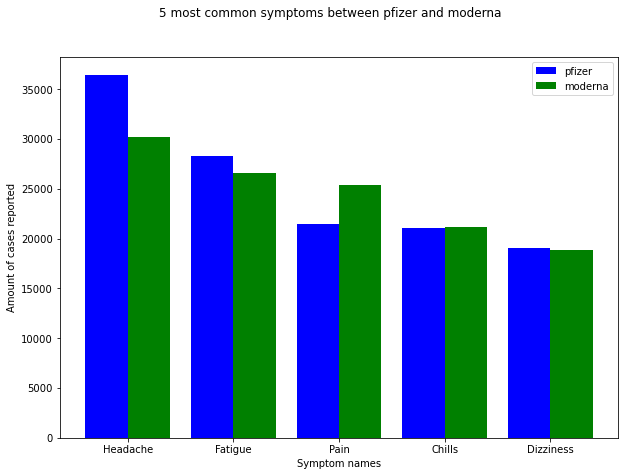

In [9]:
import numpy as np
symp_names = pfizer_symp_names

moderna_symp_amounts.sort(reverse=True)
#TODO MODERNA PAIN AND CHILLS MUST ACTUALLY BE SWITCHED! DONT KNOW HOW WITHOUT HARDCODING
x_axis = np.arange(len(symp_names))
fig = plt.figure(figsize=(10, 7))
splt = fig. add_subplot(111)
splt.bar(x_axis - 0.2, pfizer_symp_amounts, width=0.4, color='b', align='center', label='pfizer')
splt.bar(x_axis + 0.2, moderna_symp_amounts, width=0.4, color='g', align='center', label='moderna')
fig.suptitle("5 most common symptoms between pfizer and moderna")
plt.xticks(x_axis, symp_names)
splt.set_xlabel('Symptom names')
splt.set_ylabel('Amount of cases reported')
splt.legend()
plt.show()

+---+------+
|SEX| count|
+---+------+
|  F|426390|
|  M|165134|
|  U| 11938|
+---+------+



<BarContainer object of 3 artists>

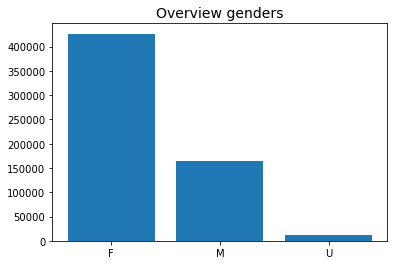

In [10]:
# now a overview of the gender of these studies
sexes = file.filter("SEX is not NULL").groupBy("SEX").count()
sexes.show()

xas = sexes.filter("SEX is not NULL").select("SEX").rdd.flatMap(lambda x: x).collect()
yas = sexes.filter("count is not NULL").select("count").rdd.flatMap(lambda x: x).collect()

plt.title('Overview genders', fontsize=14)
plt.bar(xas, yas, align="center")
#plt.show()
# TODO VERY SLOW

In [11]:
import operator
import itertools
# see the 5 most common symptoms between males and females
# the cases where the sex is filled in as 'U', will not be used here.
# simply because in my eyes 'U' means unknown, thus it would only ruin the comparison

# female
symptoms1_f = file.filter("SEX == 'F' and SYMPTOM1 is not NULL").groupBy("SYMPTOM1").count().orderBy("count", ascending=False).limit(5)
symptoms2_f = file.filter("SEX == 'F' and SYMPTOM2 is not NULL").groupBy("SYMPTOM2").count().orderBy("count", ascending=False).limit(5)
symptoms3_f = file.filter("SEX == 'F' and SYMPTOM3 is not NULL").groupBy("SYMPTOM3").count().orderBy("count", ascending=False).limit(5)
symptoms4_f = file.filter("SEX == 'F' and SYMPTOM4 is not NULL").groupBy("SYMPTOM4").count().orderBy("count", ascending=False).limit(5)
symptoms5_f = file.filter("SEX == 'F' and SYMPTOM5 is not NULL").groupBy("SYMPTOM5").count().orderBy("count", ascending=False).limit(5)

big_five_f = {}

all_rows_f = []
row1 = symptoms1_f.take(5)
row2 = symptoms2_f.take(5)
row3 = symptoms3_f.take(5)
row4 = symptoms4_f.take(5)
row5 = symptoms5_f.take(5)
all_rows_f.append(row1)
all_rows_f.append(row2)
all_rows_f.append(row3)
all_rows_f.append(row4)
all_rows_f.append(row5)

# append all symptoms for ease of use
for row in all_rows_f:
    for symp in row:
        big_five_f[symp[0]] = 0

# update the amount of times it was mentioned in the data
for row in all_rows_f:
    for symp in row:
        big_five_f[symp[0]] = big_five_f[symp[0]] + symp[1]

big_five_f_sorted = dict(sorted(big_five_f.items(), key=operator.itemgetter(1), reverse=True))

print("The 5 biggest symptoms for women: ")
female_symp_names = []
female_symp_amounts = []
top_five_f = dict(itertools.islice(big_five_f_sorted.items(), 5))
for x, y in top_five_f.items():
    print(x, y)
    female_symp_names.append(x)
    female_symp_amounts.append(y)
    
# male
symptoms1_m = file.filter("SEX == 'M' and SYMPTOM1 is not NULL").groupBy("SYMPTOM1").count().orderBy("count", ascending=False).limit(5)
symptoms2_m = file.filter("SEX == 'M' and SYMPTOM2 is not NULL").groupBy("SYMPTOM2").count().orderBy("count", ascending=False).limit(5)
symptoms3_m = file.filter("SEX == 'M' and SYMPTOM3 is not NULL").groupBy("SYMPTOM3").count().orderBy("count", ascending=False).limit(5)
symptoms4_m = file.filter("SEX == 'M' and SYMPTOM4 is not NULL").groupBy("SYMPTOM4").count().orderBy("count", ascending=False).limit(5)
symptoms5_m = file.filter("SEX == 'M' and SYMPTOM5 is not NULL").groupBy("SYMPTOM5").count().orderBy("count", ascending=False).limit(5)

big_five_m = {}

all_rows_m = []
row1 = symptoms1_m.take(5)
row2 = symptoms2_m.take(5)
row3 = symptoms3_m.take(5)
row4 = symptoms4_m.take(5)
row5 = symptoms5_m.take(5)
all_rows_m.append(row1)
all_rows_m.append(row2)
all_rows_m.append(row3)
all_rows_m.append(row4)
all_rows_m.append(row5)

# append all symptoms for ease of use
for row in all_rows_m:
    for symp in row:
        big_five_m[symp[0]] = 0

# update the amount of times it was mentioned in the data
for row in all_rows_m:
    for symp in row:
        big_five_m[symp[0]] = big_five_m[symp[0]] + symp[1]

big_five_m_sorted = dict(sorted(big_five_m.items(), key=operator.itemgetter(1), reverse=True))

print("The 5 biggest symptoms for men: ")
male_symp_names = []
male_symp_amounts = []
top_five_m = dict(itertools.islice(big_five_m_sorted.items(), 5))
for x, y in top_five_m.items():
    print(x, y)
    male_symp_names.append(x)
    male_symp_amounts.append(y)


The 5 biggest symptoms for women: 
Headache 53855
Fatigue 49225
Chills 41272
Pain 40733
Pyrexia 32759
The 5 biggest symptoms for men: 
Pyrexia 15508
Fatigue 15504
Headache 15361
Chills 14001
Dizziness 10880


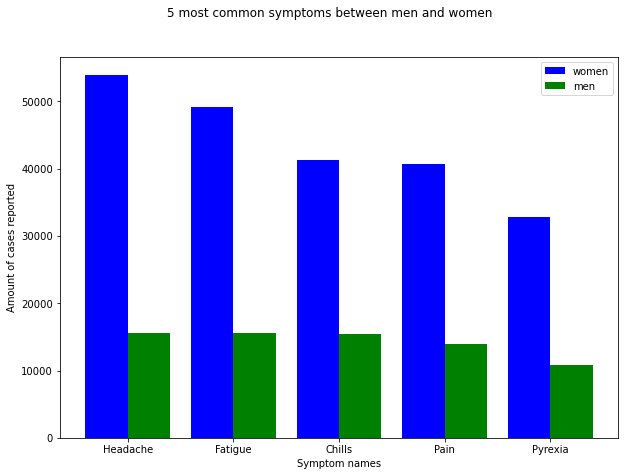

In [12]:
symp_names = female_symp_names
x_axis = np.arange(len(symp_names))
fig = plt.figure(figsize=(10, 7))
splt = fig. add_subplot(111)
splt.bar(x_axis - 0.2, female_symp_amounts, width=0.4, color='b', align='center', label='women')
splt.bar(x_axis + 0.2, male_symp_amounts, width=0.4, color='g', align='center', label='men')
fig.suptitle("5 most common symptoms between men and women")
plt.xticks(x_axis, symp_names)
splt.set_xlabel('Symptom names')
splt.set_ylabel('Amount of cases reported')
splt.legend()
plt.show()

In [20]:
# loading in a new file. This time its from 2020 not 2021
file_2020 = spark.read.option("header", "true").csv(path="2020Covid19VAERSDataset.csv")

In [21]:
total_lines_2020 = file_2020.count()

14073


+--------------------+-----+
|            VAX_MANU|count|
+--------------------+-----+
|     PFIZER\BIONTECH| 1178|
|             MODERNA|  916|
|UNKNOWN MANUFACTURER|    5|
|             JANSSEN|    1|
+--------------------+-----+



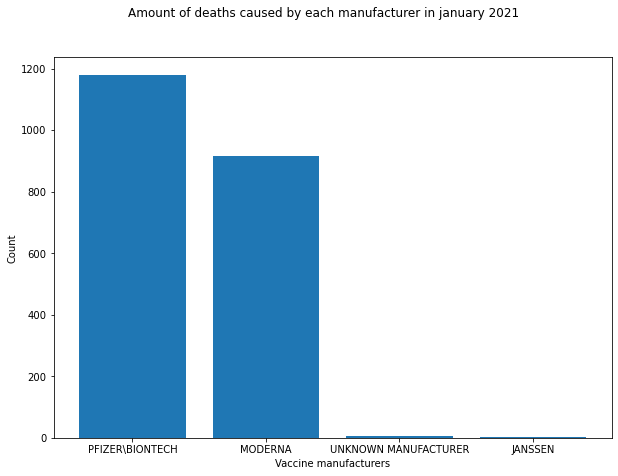

+---------------+-----+
|       VAX_MANU|count|
+---------------+-----+
|PFIZER\BIONTECH|   11|
|        MODERNA|    6|
+---------------+-----+



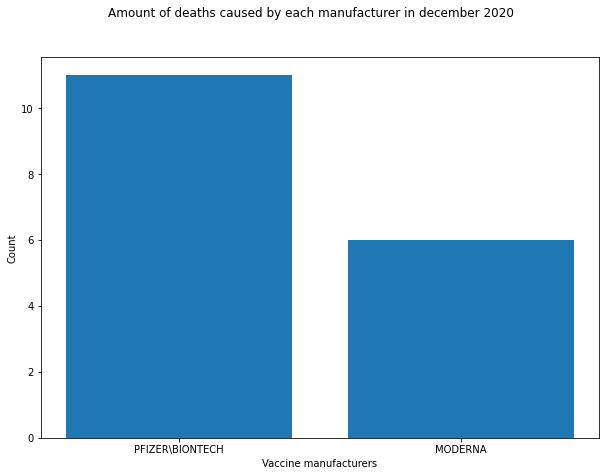

In [46]:
# now instead of the symptoms people got from the vaccine, lets compare wich vaccine caused the most deaths.
manus_caused_death_2021 = file.where("DIED == 'Y' and DIED is not NULL and VAX_DATE like '01%'").groupBy("VAX_MANU").count().orderBy("count", ascending=False)
manus_caused_death_2021.show()

xas_2021 = manus_caused_death_2021.filter("VAX_MANU is not NULL").select("VAX_MANU").rdd.flatMap(lambda x: x).collect()
yas_2021 = manus_caused_death_2021.filter("count is not NULL").select("count").rdd.flatMap(lambda x: x).collect()

fig_2021 = plt.figure(figsize=(10, 7))
fig_2021.suptitle("Amount of deaths caused by each manufacturer in january 2021")
sub_2021 = fig_2021.add_subplot(111)
sub_2021.set_xlabel("Vaccine manufacturers")
sub_2021.set_ylabel("Count")
sub_2021.bar(xas_2021, yas_2021, align="center")
plt.show()




manus_caused_death_2020 = file_2020.where("DIED == 'Y' and DIED is not NULL and VAX_DATE like '12%'").groupBy("VAX_MANU").count().orderBy("count", ascending=False)
manus_caused_death_2020.show()

xas_2020 = manus_caused_death_2020.filter("VAX_MANU is not NULL").select("VAX_MANU").rdd.flatMap(lambda x: x).collect()
yas_2020 = manus_caused_death_2020.filter("count is not NULL").select("count").rdd.flatMap(lambda x: x).collect()

fig_2020 = plt.figure(figsize=(10, 7))
fig_2020.suptitle("Amount of deaths caused by each manufacturer in december 2020")
sub_2020 = fig_2020.add_subplot(111)
sub_2020.set_xlabel("Vaccine manufacturers")
sub_2020.set_ylabel("Count")
sub_2020.bar(xas_2020, yas_2020, align="center")
plt.show()

In [53]:
# of course we need to keep in mind that the second dataset has way less data to work with.
print("Total data to work with: ")
print("with dataset from 2021: " + str(total_lines))
print("with dataset from 2020: " + str(total_lines_2020))
print("The second set has in fact only " + str(round(total_lines_2020/total_lines*100, 2)) + "% data of the first one.")

Total data to work with: 
with dataset from 2021: 603462
with dataset from 2020: 14073
The second set has in fact only 2.33% data of the first one.
